<a href="https://colab.research.google.com/github/azdfkpot/NNs-and-functions-/blob/main/2D_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

313/313 [==============================] - 0s 1ms/step


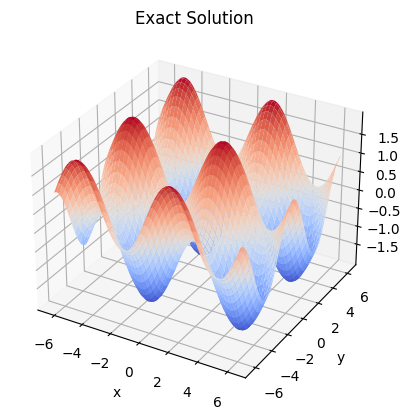

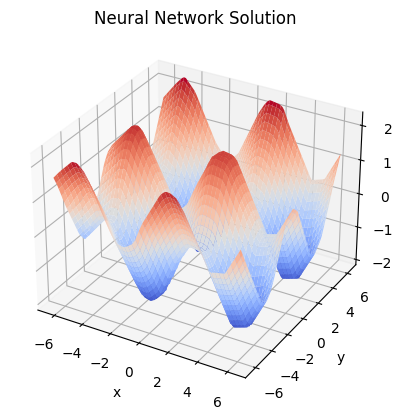

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras.models import Sequential
from keras.layers import Dense

# Define the function to be approximated
def g(x,y):
    return np.sin(x) + np.cos(y)

# Generate input and output data
n_samples = 1000
x_train = np.random.uniform(-2*np.pi, 2*np.pi, (n_samples, 2))
y_train = g(x_train[:,0], x_train[:,1])

# Define the neural network model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(x_train, y_train, epochs=1000, batch_size=32, verbose=0)

# Generate test data
x_test = np.linspace(-2*np.pi, 2*np.pi, 100)
y_test = np.linspace(-2*np.pi, 2*np.pi, 100)
x_test, y_test = np.meshgrid(x_test, y_test)
z_exact = g(x_test, y_test)
z_nn = model.predict(np.column_stack((x_test.flatten(), y_test.flatten())))
z_nn = np.reshape(z_nn, (100, 100))

# Plot the exact solution
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(x_test, y_test, z_exact, cmap='coolwarm')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Exact Solution')

# Plot the neural network solution
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(x_test, y_test, z_nn, cmap='coolwarm')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Neural Network Solution')

plt.show()